In [2]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path

%matplotlib inline

In [37]:
 # Set a random seed for TensorFlow to allow reproducible testing results
tf.random.set_seed(126)

In [17]:
risk_df = pd.read_csv(Path('credit_risk_dataset.csv'))
#risk_df = risk_df.drop(columns=['cb_person_default_on_file', 'cb_person_cred_hist_length', 'loan_percent_income'])
risk_df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [18]:
risk_df.dropna(inplace=True)
risk_df.head(15)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [ ]:
# Define function to replace string values with integers values
risk_df['RENT'] = risk_df['person_home_ownership'].apply(lambda x: 1 if x == "RENT" else 0)
risk_df['OWN'] = risk_df['person_home_ownership'].apply(lambda x: 1 if x == "OWN" else 0)
risk_df['MORTGAGE'] = risk_df['person_home_ownership'].apply(lambda x: 1 if x == "MORTGAGE" else 0)
risk_df['OTHER'] = risk_df['person_home_ownership'].apply(lambda x: 1 if x == "OTHER" else 0)
#def changeOwnership(ownership):
#    if ownership == "RENT":
#        return 1
 #   risk_df['Rent'].append
#    elif ownership == "OWN":
 #       return 2
 #   elif ownership == "MORTGAGE":
 #       return 3
#    elif ownership == "OTHER":
  #      return 0
# Transform Ownership column
#risk_df['person_home_ownership'] = risk_df['person_home_ownership'].apply(changeOwnership)

risk_df['PERSONAL'] = risk_df['loan_intent'].apply(lambda x: 1 if x == "PERSONAL" else 0)
risk_df['EDUCATION'] = risk_df['loan_intent'].apply(lambda x: 1 if x == "EDUCATION" else 0)
risk_df['MEDICAL'] = risk_df['loan_intent'].apply(lambda x: 1 if x == "MEDICAL" else 0)
risk_df['VENTURE'] = risk_df['loan_intent'].apply(lambda x: 1 if x == "VENTURE" else 0)
risk_df['DEBTCONSOLIDATION'] = risk_df['loan_intent'].apply(lambda x: 1 if x == "DEBTCONSOLIDATION" else 0)
risk_df['HOMEIMPROVEMENT'] = risk_df['loan_intent'].apply(lambda x: 1 if x == "HOMEIMPROVEMENT" else 0)

# Define function to replace string values with integers values
#def changeLoanIntent(intent):
#    if intent == "PERSONAL":
#        return 0
#    elif intent == "EDUCATION":
#        return 1
#    elif intent == "MEDICAL":
#        return 2
#    elif intent == "VENTURE":
#        return 3
#    elif intent == "DEBTCONSOLIDATION":
 ##       return 4  
   # elif intent == "HOMEIMPROVEMENT":
   #     return 5 
# Transform Loan_Intent column
#risk_df['loan_intent'] = risk_df['loan_intent'].apply(changeLoanIntent)

risk_df['A'] = risk_df['loan_grade'].apply(lambda x: 1 if x == "A" else 0)
risk_df['B'] = risk_df['loan_grade'].apply(lambda x: 1 if x == "B" else 0)
risk_df['C'] = risk_df['loan_grade'].apply(lambda x: 1 if x == "C" else 0)
risk_df['D'] = risk_df['loan_grade'].apply(lambda x: 1 if x == "D" else 0)
risk_df['E'] = risk_df['loan_grade'].apply(lambda x: 1 if x == "E" else 0)
risk_df['F'] = risk_df['loan_grade'].apply(lambda x: 1 if x == "F" else 0)
risk_df['G'] = risk_df['loan_grade'].apply(lambda x: 1 if x == "G" else 0)


# Define function to replace string values with integers values
#def changeLoanGrade(grade):
#    if grade == "F":
#        return 0
#    elif grade == "D":
 #       return 1
 #   elif grade == "C":
 #       return 2
 #   elif grade == "B":
 #       return 3
 #   elif grade == "A":
 #       return 4
 #   else:
 #       return -1
# Transform Loan_Grade column
#risk_df['loan_grade'] = risk_df['loan_grade'].apply(changeLoanGrade)

# Define function to replace string values with integers values
def changeDefault(default):
    if default == "N":
        return 0
    elif default == "Y":
        return 1
# Transform Default_on_file column
#risk_df['cb_person_default_on_file'] = risk_df['cb_person_default_on_file'].apply(changeDefault)    

risk_df.head(20)

In [19]:
#X = risk_df.drop(columns=['loan_status', 'person_home_ownership', 'loan_intent', 'loan_grade']).values
risk_df = pd.get_dummies(risk_df, columns=["person_home_ownership", "loan_intent", "loan_grade", 'cb_person_default_on_file'])
#X = pd.get_dummies(risk_df.drop('loan_status', axis=1))
#y = risk_df["loan_status"].values
#y = y.reshape(-1, 1)
#X.shape
#X = X.reshape(-1, 1)

risk_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1


In [22]:
X = risk_df.drop(columns=['loan_status']).values
y = risk_df["loan_status"].values
X.shape

(28638, 26)

In [23]:
# Creating training, validation, and testing sets
from sklearn.model_selection import train_test_split

# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=1)

In [24]:
# Import the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

StandardScaler()

In [25]:
# transform the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
# Import Keras modules for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LeakyReLU


In [ ]:
#number_inputs = 11
#number_hidden_nodes = 69

#model = Sequential()

#model.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))
# Output layer
#number_classes = 1

#model.add(Dense(units=number_classes, activation="sigmoid"))

In [27]:
#Model set-up
number_input_features = 26
hidden_nodes_layer1 = 25
hidden_nodes_layer2 = 15
dropout_num = 0.2
# Define the LSTM RNN model
model = Sequential()

# Layer 1
model.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
model.add(
    Dropout(dropout_num))
# Layer 2
model.add(Dense(units=hidden_nodes_layer2, activation="relu"))
model.add(
    Dropout(dropout_num))
# Output layer
model.add(Dense(1, activation="sigmoid"))

In [28]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                675       
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                390       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 1,081
Trainable params: 1,081
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [30]:
# Training the model
# Fitting the model with linear dummy data
model = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
672/672 [==============================] - 1s 957us/step - loss: 0.4186 - accuracy: 0.8180
Epoch 2/100
672/672 [==============================] - 1s 869us/step - loss: 0.3362 - accuracy: 0.8707
Epoch 3/100
672/672 [==============================] - 1s 804us/step - loss: 0.3188 - accuracy: 0.8811
Epoch 4/100
672/672 [==============================] - 1s 839us/step - loss: 0.3117 - accuracy: 0.8850
Epoch 5/100
672/672 [==============================] - 1s 846us/step - loss: 0.3004 - accuracy: 0.8935
Epoch 6/100
672/672 [==============================] - 1s 953us/step - loss: 0.2952 - accuracy: 0.8939
Epoch 7/100
672/672 [==============================] - 1s 1ms/step - loss: 0.2904 - accuracy: 0.8953
Epoch 8/100
672/672 [==============================] - 1s 1ms/step - loss: 0.2852 - accuracy: 0.8986
Epoch 9/100
672/672 [==============================] - 1s 850us/step - loss: 0.2787 - accuracy: 0.9013
Epoch 10/100
672/672 [==============================] - 1s 804us/step - loss:

<AxesSubplot:>

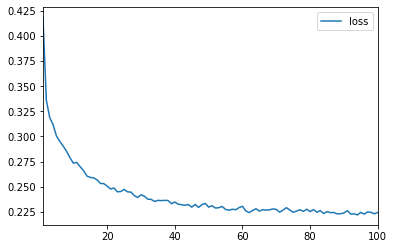

In [31]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

<AxesSubplot:>

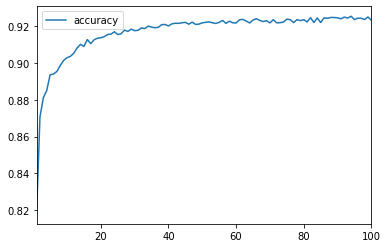

In [32]:
# Plot the accuracy
df.plot(y="accuracy")

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
# Create and train LR model
classifier = LogisticRegression(random_state=1)

classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [36]:
# Make LR predictions
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(25)

,Prediction,Actual
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
